Connected to keypoint_moseq (Python 3.10.16)

Connected to keypoint_moseq (Python 3.10.16)

In [ ]:
import keypoint_moseq as kpms
import os

project_dir = "/home/pedrov/kpms_project"
config = lambda: kpms.load_config(project_dir)


In [ ]:
allmodels = set()
for entry in os.listdir(project_dir):
    if os.path.isdir(os.path.join(project_dir, entry)) and entry.startswith("2025_"):
        allmodels.add(entry)
model_name = max(allmodels)

In [ ]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

In [ ]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True)
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,20250117-OFT-test1-toe1-con-conv.analysis,594.589733,182.368154,0.983989,0.000000,0.000000,0,0,wt,True
1,20250117-OFT-test1-toe1-con-conv.analysis,594.741382,181.174362,0.996950,-0.001301,36.101563,0,1,wt,False
2,20250117-OFT-test1-toe1-con-conv.analysis,594.067523,180.952353,0.996950,-0.004248,21.284674,0,2,wt,False
3,20250117-OFT-test1-toe1-con-conv.analysis,594.440792,181.533111,0.996950,-0.009730,20.711097,0,3,wt,False
4,20250117-OFT-test1-toe1-con-conv.analysis,595.006876,180.465860,0.990897,-0.018262,36.242634,0,4,wt,False
...,...,...,...,...,...,...,...,...,...,...
702997,NS-SS2-2-toe5-het-conv.analysis,445.428425,339.986724,0.604334,-0.069002,42.985584,3,17494,het,False
702998,NS-SS2-2-toe5-het-conv.analysis,444.058965,340.495725,0.604334,-0.023946,43.829811,3,17495,het,False
702999,NS-SS2-2-toe5-het-conv.analysis,445.309619,339.995900,0.619648,0.005737,40.405015,3,17496,het,False
703000,NS-SS2-2-toe5-het-conv.analysis,445.893184,340.859911,0.619648,0.017242,31.278686,3,17497,het,False


In [ ]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    min_frequency=0.005,  # threshold frequency for including a syllable in the dataframe
    groupby=["group", "name"],  # column(s) to group the dataframe by
    fps=25,
)  # frame rate of the video from which keypoints were inferred
stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,HOM,20250117-OFT-test1-toe2-homo-conv.analysis,0,-0.615951,1.235193,-2.678827,2.907306,0.095720,2.116789,-7.354109,7.048496,91.366695,105.445846,0.000000,430.987327,0.043557,0.105000
1,HOM,20250117-OFT-test1-toe2-homo-conv.analysis,1,0.151745,1.979481,-3.136583,3.139012,0.318241,10.490069,-187.002457,187.862066,70.917106,63.325597,1.099671,463.979154,0.087114,1.350000
2,HOM,20250117-OFT-test1-toe2-homo-conv.analysis,2,0.783182,1.741823,-2.906296,2.996113,-0.008060,0.799807,-3.341171,3.431975,39.220495,38.513730,0.977906,356.363850,0.036298,1.280000
3,HOM,20250117-OFT-test1-toe2-homo-conv.analysis,3,1.153706,1.801983,-1.996371,2.449962,-0.049060,0.350099,-2.135752,0.179894,19.649337,10.978108,0.975862,45.941821,0.005445,0.826667
4,HOM,20250117-OFT-test1-toe2-homo-conv.analysis,4,-0.118376,0.680205,-1.787627,1.636588,0.473300,1.349206,-3.411341,4.328865,277.190162,130.564692,16.910012,640.405369,0.023593,0.895385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,wt,NS-SS2-2-toe4-wt-conv.analysis,10,0.742656,1.258411,-2.750833,2.892051,2.506980,31.547195,-5.568206,183.549634,111.005953,69.970473,18.741067,274.125830,0.006452,0.466667
929,wt,NS-SS2-2-toe4-wt-conv.analysis,11,0.464252,2.136683,-3.099066,3.095551,-0.103872,17.091679,-186.717247,5.348167,131.495496,81.761580,12.526816,431.263374,0.008602,1.220000
930,wt,NS-SS2-2-toe4-wt-conv.analysis,14,0.186270,1.998067,-3.140740,3.141472,0.140454,15.488120,-188.142830,188.058907,79.398221,67.527381,1.293579,423.406950,0.098925,3.711304
931,wt,NS-SS2-2-toe4-wt-conv.analysis,17,-0.543518,0.845403,-1.470224,2.416796,0.507836,1.259806,-2.469210,3.065919,32.489064,21.102532,1.086269,122.268206,0.015054,0.702857


/home/pedrov/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedrov/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedrov/anaconda3/envs/keypoint_moseq/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to /home/pedrov/kpms_project/2025_04_25-19_48_27/figures/frequency_stat_stats.png


(<Figure size 800x400 with 1 Axes>,
 <matplotlib.legend.Legend at 0x7f612a203490>)

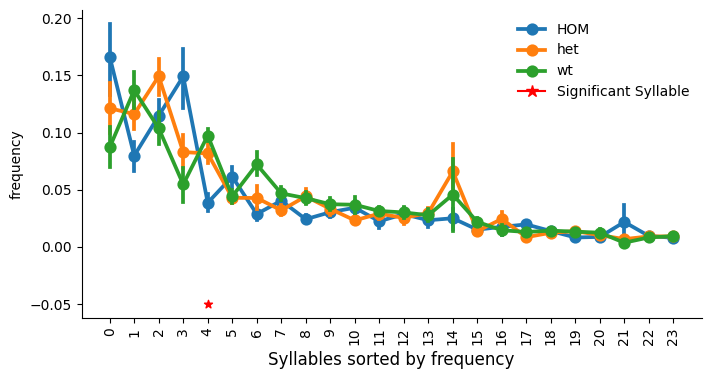

In [ ]:
kpms.plot_syll_stats_with_sem(
    stats_df,
    project_dir,
    model_name,
    plot_sig=True,  # whether to mark statistical significance with a star
    thresh=0.05,  # significance threshold
    stat="frequency",  # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order="stat",  # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group="wt",  # name of the control group for statistical testing
    exp_group="HOM",  # name of the experimental group for statistical testing
    figsize=(8, 4),  # figure size
    groups=stats_df["group"].unique(),  # groups to be plotted
)

Group(s): HOM, het, wt
Saved figure to /home/pedrov/kpms_project/2025_04_25-19_48_27/figures/transition_matrices.png


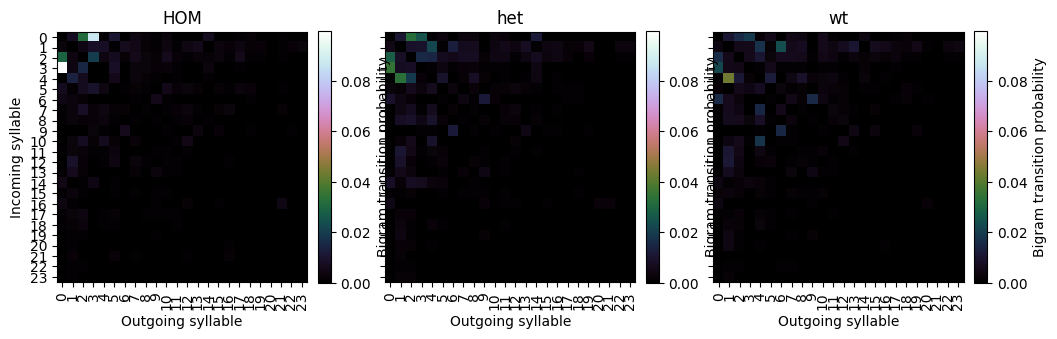

In [ ]:
normalize = "bigram"  # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include = kpms.generate_transition_matrices(
    project_dir,
    model_name,
    normalize=normalize,
    min_frequency=0.005,  # minimum syllable frequency to include
)

kpms.visualize_transition_bigram(
    project_dir,
    model_name,
    groups,
    trans_mats,
    syll_include,
    normalize=normalize,
    show_syllable_names=True,  # label syllables by index (False) or index and name (True)
)


Saved figure to /home/pedrov/kpms_project/2025_04_25-19_48_27/figures/transition_graphs.png


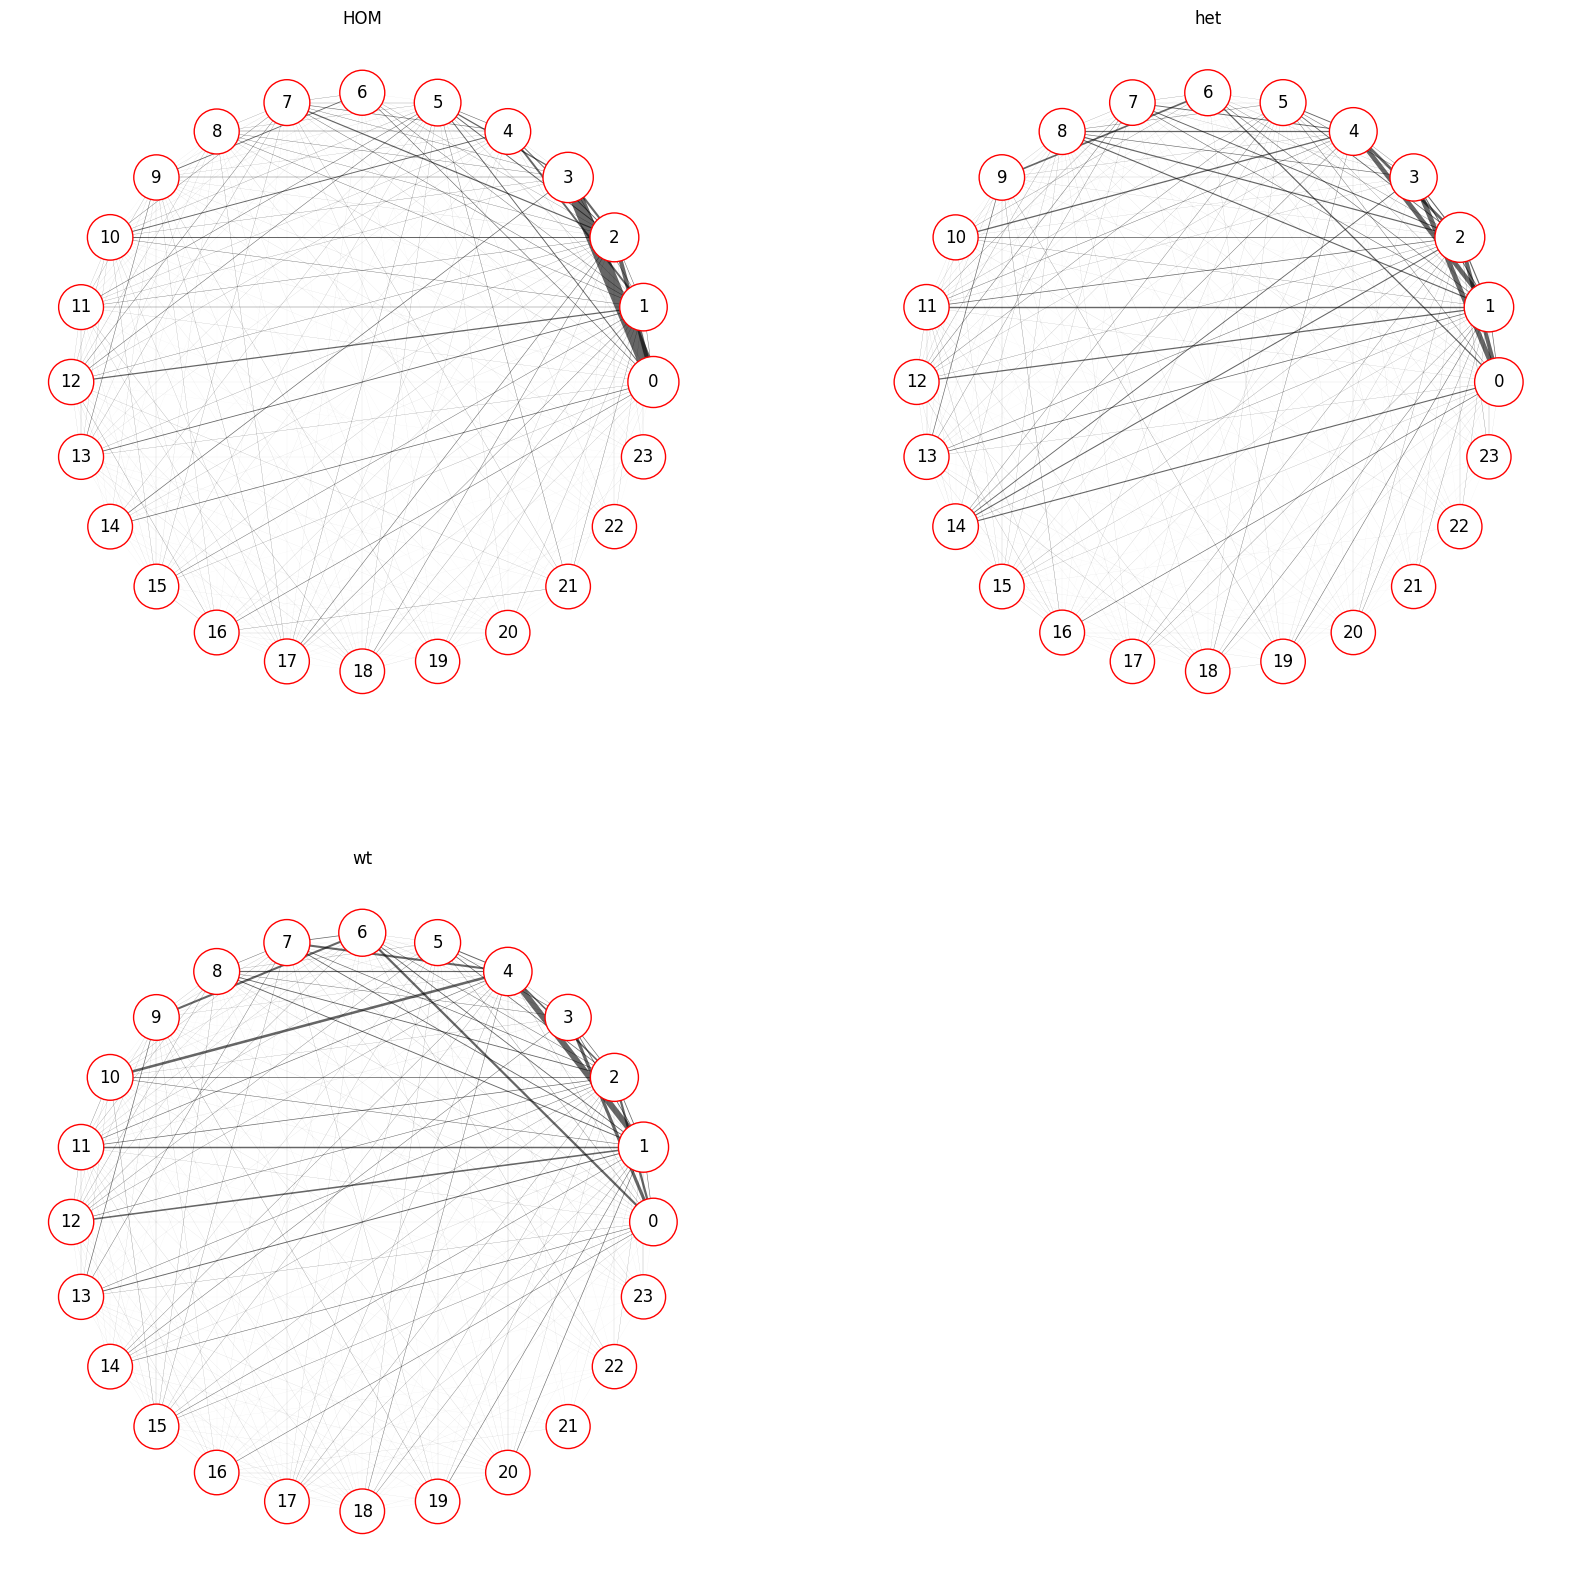

In [ ]:
# Generate a transition graph for each single group
kpms.plot_transition_graph_group(
    project_dir,
    model_name,
    groups,
    trans_mats,
    usages,
    syll_include,
    layout="circular",  # transition graph layout ("circular" or "spring")
    show_syllable_names=False,  # label syllables by index (False) or index and name (True)
)

Saved figure to /home/pedrov/kpms_project/2025_04_25-19_48_27/figures/transition_graphs_diff.png


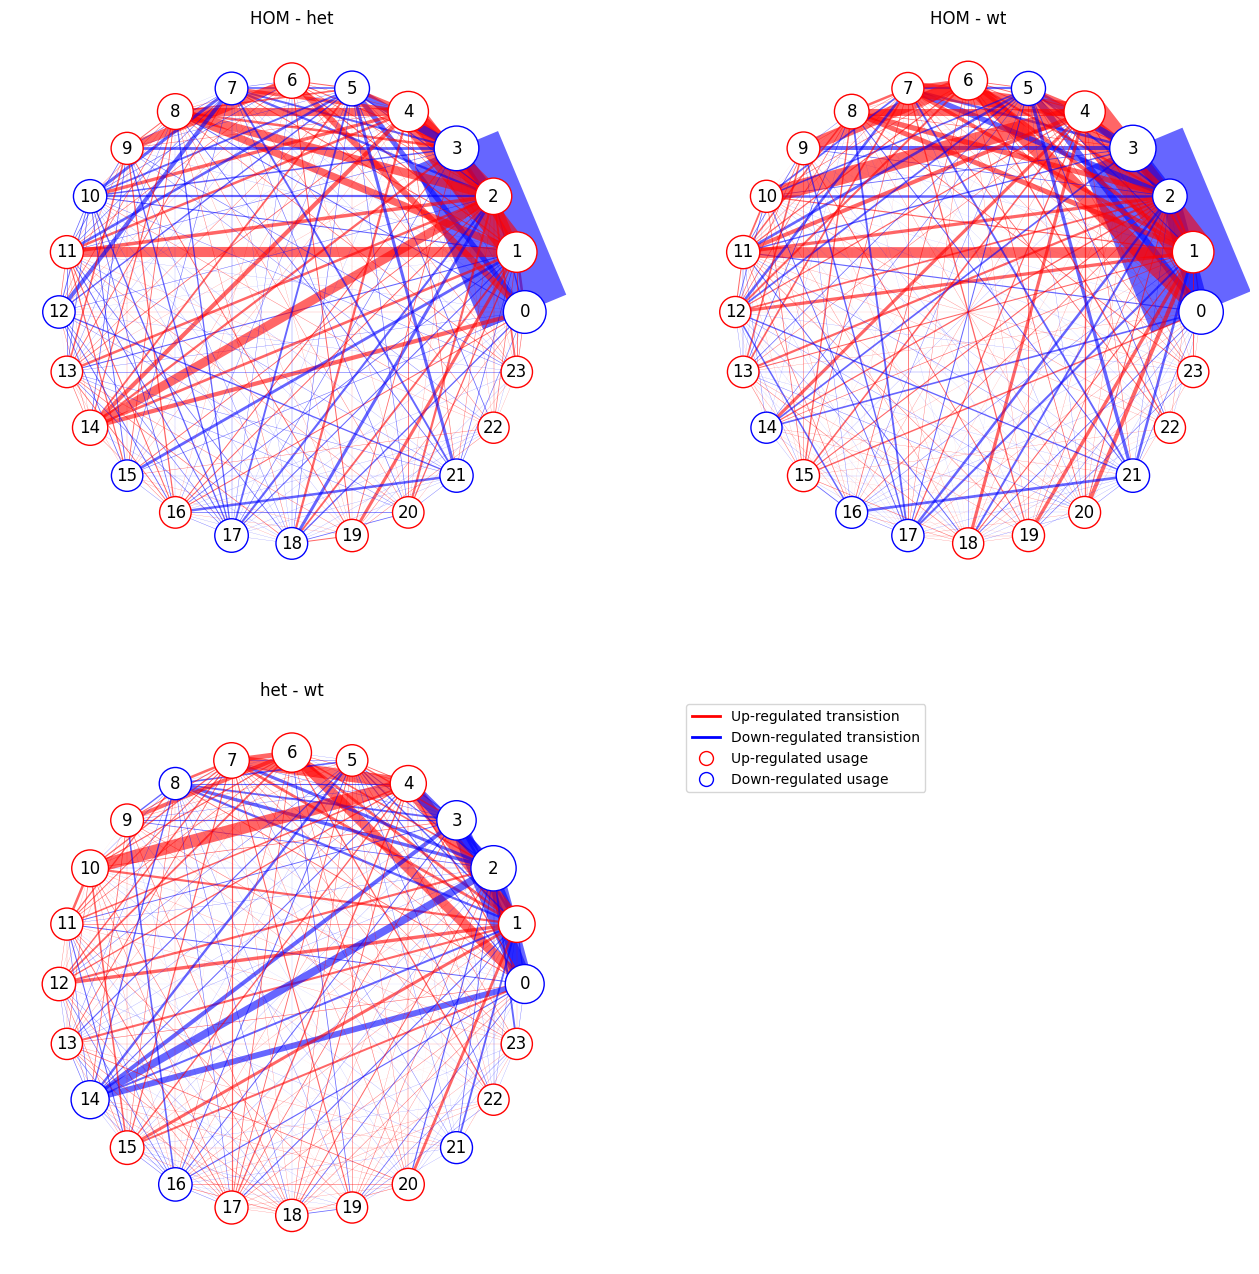

In [ ]:
# Generate a difference-graph for each pair of groups.
kpms.plot_transition_graph_difference(
    project_dir, model_name, groups, trans_mats, usages, syll_include, layout="circular"
)  # transition graph layout ("circular" or "spring")